# dpu_mini demos

A basic overview on surface plotting, and colormaps: 

[1] Freeview: There are also a bunch of command line tools you can use with this. For quick useable stuff. Essentially all plotting requires freesurfer, so it is worth getting used to this. 

[2] Matplotlib - inline; very basic flattening 



In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os


In [48]:
# FOR MY OWN TESTING OF THIS EXAMPLE FOLDER
fs_dir = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer'
from pfa_scripts.load_saved_info import *
from dpu_mini.stats import dag_coord_convert
sub='sub-07'
prfs = load_data_prf(sub, 'AS0', 'gauss')['AS0']['gauss']
ecc, pol = dag_coord_convert(prfs[:,0], prfs[:,1], 'cart2pol')

polar_angle_data = pol
eccentricity_data = ecc
data_mask = prfs[:,-1] > 0.1
data_alpha = prfs[:,-1]

/data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/prf_no_hrf/sub-07/ses-1/sub-07_model-gauss_roi-all_task-AS0-fits_stage-iter_constr-tc_desc-prf_params.pkl


In [2]:
# sub = 'sub-02'                                      # Subject number
# fs_dir = '~/home/project1/derivatives/freesurfer'   # e.g., /home/project1/derivatives/freesurfer

# # Load some data to plot on the surface (e.g., PRF eccentricity and polar angle):
# # -> should 1D np.ndarray, where the length = number of vertices in subject surface

# polar_angle_data = np.load('path/to/subjects/polar/angle/data')
# eccentricity_data = np.load('path/to/subjects/polar/angle/data')

# ** Control visibility of data ** [using mask, or alpha, or both...] 
# If you don't want to show the values of every point (for example because it is outside the visual cortex). You may want to hide it. 
# If you are plotting PRFs, then you may want to hide the bad fits. So you can create a mask for where the rsq<threshold (e.g., 0.1)
# data_mask: what to show (TRUE), what to hide (FALSE)
# -> should boolean 1D np.ndarray, where the length = number of vertices in subject surface
# -> if unspecified, all surface functions assume TRUE for all voxels
# data_mask = np.load('path/to/some/mask')

# data_alpha: transparency (invisible = 0), (opaque = 1).
# -> should be 1D np.ndarray, min=0, max=1.  where the length = number of vertices in subject surface
# -> you could for example take the rsquared values of PRF fits and use this to determine the visibility of the prf data...
# data_alpha = np.load('path/to/some/alpha/values')

### [1] Using freeview
* requires freeview 
* Specify the data, the mesh, and the mask (you can only use binary masking, the option for varying the transparency is not available here). 
* scripts will create a custom surf file, and the command (which contains the colormap info) to open it in freeview
* The colormap can be anything from matplotlib. Just specify the min and max values. (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
* You can also specify the camera angle for when freeview opens, and ask it to automatically take a picture of the surface. This can be useful if you want to iterate through several subjects/surface plots and save the figures as pngs, but can't be bothered to sit and click again and again... 

In [3]:
from dpu_mini.fs_tools import FSMaker
fs = FSMaker(sub=sub,fs_dir=fs_dir)

# Add polar angle plot
fs.add_surface(
    data = polar_angle_data,
    surf_name = f'{sub}-polar_angle',    
    vmin = -3.14, vmax=3.14, # min and max values of polar anlge 
    data_mask=data_mask,
    cmap = 'marco_pol', # A colleague (Marco Aqil) suggested this custom color map for polar angles. I called it 'marco_pol'
)

# Add eccentricity
fs.add_surface(
    data = eccentricity_data,
    surf_name = f'{sub}-eccentricity',    
    vmin = 0, vmax = 5, # min and max values of eccentricity
    data_mask=data_mask,
    cmap = 'ecc', # Also a custom map for eccentricity, which scales nicely. (again you can use anything you like, including developing your own. ) 
)

Using fs dir = /data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer
marco_pol exists
Saving sub-02-polar_angle in /data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer/sub-02/surf/custom
ecc exists
Saving sub-02-eccentricity in /data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer/sub-02/surf/custom


In [4]:
# Now we can open one of the surfaces in freeview
fs.open_fs_surface(
    surf_name=f'{sub}-polar_angle',
    mesh = 'inflated',          # what type of surface? inflated? pial?
    )

freeview -f  lh.inflated:overlay=/data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer/sub-02/surf/custom/lh.sub-02-polar_angle:overlay_custom=-3.14,255,0,0,-2.81,255,166,0,-2.48,186,220,0,-2.15,29,142,0,-1.82,0,223,191,-1.49,0,160,255,-1.16,0,43,255,-0.83,97,53,248,-0.50,235,128,238,-0.17,249,41,76,0.17,255,81,0,0.50,252,253,0,0.83,104,179,0,1.16,0,157,58,1.49,0,235,215,1.82,0,125,255,2.15,27,15,253,2.48,174,95,242,2.81,243,84,155,3.14,255,0,0, rh.inflated:overlay=/data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer/sub-02/surf/custom/rh.sub-02-polar_angle:overlay_custom=-3.14,255,0,0,-2.81,255,166,0,-2.48,186,220,0,-2.15,29,142,0,-1.82,0,223,191,-1.49,0,160,255,-1.16,0,43,255,-0.83,97,53,248,-0.50,235,128,238,-0.17,249,41,76,0.17,255,81,0,0.50,252,253,0,0.83,104,179,0,1.16,0,157,58,1.49,0,235,215,1.82,0,125,255,2.15,27,15,253,2.48,174,95,242,2.81,243,84,155,3.14,255,0,0, --camera Azimuth 90 Zoom 1 Elevation 0 Roll 0 --c

QXcbConnection: XCB error: 11 (BadAlloc), sequence: 1251, resource id: 1307, major code: 53 (CreatePixmap), minor code: 0
QXcbConnection: XCB error: 11 (BadAlloc), sequence: 1251, resource id: 1307, major code: 53 (CreatePixmap), minor code: 0
QXcbConnection: XCB error: 4 (BadPixmap), sequence: 1603, resource id: 56623197, major code: 54 (FreePixmap), minor code: 0
QXcbConnection: XCB error: 4 (BadPixmap), sequence: 1603, resource id: 56623197, major code: 54 (FreePixmap), minor code: 0


I've written many possible things you can do with this. See the notes for 'write_fs_cmd'

For write_fs_cmd
        '''
        Write the bash command to open the specific surface with the overlay

        **kwargs 
        surf_name       which surface(s) to open (of the custom ones you have made)
        mesh_list       which mesh(es) to plot the surface info on (e.g., inflated, pial...)
        hemi_list       which hemispheres to load
        roi_list        which roi outlines to load
        roi_col_spec    if loading rois, what color? If not specified will do different colors for each nes     
        roi_mask        mask by roi?
        keep_running    keep running the command (use "&" at the end of the command). Useful if you want to take many screen shots.
        shading_off     Turn of shading? i.e., don't make it darker underneath. Default is false        
        do_scrn_shot    bool            take a screenshot of the surface when it is loaded?
        scr_shot_file   str             Where to put the screenshot. If not specified goes in custom surface dir
        azimuth         float           camera angle(0-360) Default: 0
        zoom            float           camera zoom         Default: 1.00
        elevation       float           camera angle(0-360) Default: 0
        roll            float           camera angle(0-360) Default: 0        
        do_col_bar      bool            show color bar at the end. Default is true
        '''

See also dag_make_overlay_str

In [5]:
# Maybe we want to open with a specific cameram angle and take a screenshot?
scr_shot_file = './z_screenshots'
if not os.path.exists(scr_shot_file):
    os.makedirs(scr_shot_file)
scr_shot_file = os.path.abspath(scr_shot_file)
fs.open_fs_surface(
    surf_name=f'{sub}-polar_angle',
    mesh = 'inflated',          # what type of surface? inflated? pial?
    hemi_list= 'lh', 
    do_scr_shot = True,
    scr_shot_file = os.path.join(scr_shot_file,'eg.png'), # Where to put it?
    # *** camera angles ***
    azimuth = 10, zoom = 1, elevation=5, roll=0, 
    )

freeview -f  lh.inflated:overlay=/data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer/sub-02/surf/custom/lh.sub-02-polar_angle:overlay_custom=-3.14,255,0,0,-2.81,255,166,0,-2.48,186,220,0,-2.15,29,142,0,-1.82,0,223,191,-1.49,0,160,255,-1.16,0,43,255,-0.83,97,53,248,-0.50,235,128,238,-0.17,249,41,76,0.17,255,81,0,0.50,252,253,0,0.83,104,179,0,1.16,0,157,58,1.49,0,235,215,1.82,0,125,255,2.15,27,15,253,2.48,174,95,242,2.81,243,84,155,3.14,255,0,0, --camera Azimuth 10 Zoom 1 Elevation 5 Roll 0 --colorscale --ss /data1/projects/dumoulinlab/Lab_members/Marcus/programs/dpu_mini/notebooks/z_screenshots/eg.png 5 autotrim  --verbose  --viewport 3d --viewsize 99999 99999 --nocursor 
freeview -f  lh.inflated:overlay=/data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer/sub-02/surf/custom/lh.sub-02-polar_angle:overlay_custom=-3.14,255,0,0,-2.81,255,166,0,-2.48,186,220,0,-2.15,29,142,0,-1.82,0,223,191,-1.49,0,160,255,-1.16,0,43,255,-0.

QXcbConnection: XCB error: 11 (BadAlloc), sequence: 1253, resource id: 1307, major code: 53 (CreatePixmap), minor code: 0
QXcbConnection: XCB error: 4 (BadPixmap), sequence: 1493, resource id: 56623197, major code: 54 (FreePixmap), minor code: 0
QXcbConnection: XCB error: 4 (BadPixmap), sequence: 1493, resource id: 56623197, major code: 54 (FreePixmap), minor code: 0


Command line options
Inside /bin/

See the functions themselves for specifics  
```

dag_auto_FS_surf_from_file          Automatically make freesurfer surfaces given a .npy or pickle file (i.e., from saved prf parameters)

dag_clean_custom_surfs              Remove custom surfaces put in the subjects FS dir

dag_make_fs_overlay                 Make an fs_overlay (something you can load in freesurfer to determine the colomap)

dag_open_sub_surf                   Open any subjects surface in there custom surf folder, inside freesurfer (i.e. surfaces that you have made before)

dag_print_custom_rois               Print all the rois matching a certain pattern in a FS folder

dag_print_custom_surfs              Print all the surfaces matching a certain pattern in a FS folder

```

***

### Matplotlib
* as above

In [49]:
from dpu_mini.mesh_maker import *

gm = GenMeshMaker(
    sub = sub,
    fs_dir = fs_dir, 
    output_dir = 'z_pyctx',
    )



Using fs dir = /data1/projects/dumoulinlab/Lab_members/Marcus/projects/pilot1/derivatives/freesurfer
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...


In [50]:
# Try to make a flat surface to plot here
# Let look at V1
v1_bool = dag_load_roi(sub, roi='v1custom', fs_dir=gm.fs_dir)
# Use this to make a flat map 
gm.make_flat_map(
    centre_bool=v1_bool,  # centre the surface here
    vx_to_include = v1_bool, # cut out everything apart from v1
    morph = 20,                  # Add a little buffer around the edge of the ROI
    method='latlon',    # Use a primitive latitude and longitude metho...
)

centering!
Faces with missing vx: 264601
Faces with long edges: 1314
0.043760615807162735
centering!
Faces with missing vx: 266302
Faces with long edges: 1383
0.04590239113767135


{'cmap': 'marco_pol', 'vmin': -3.141592653589793, 'vmax': 3.141592653589793}

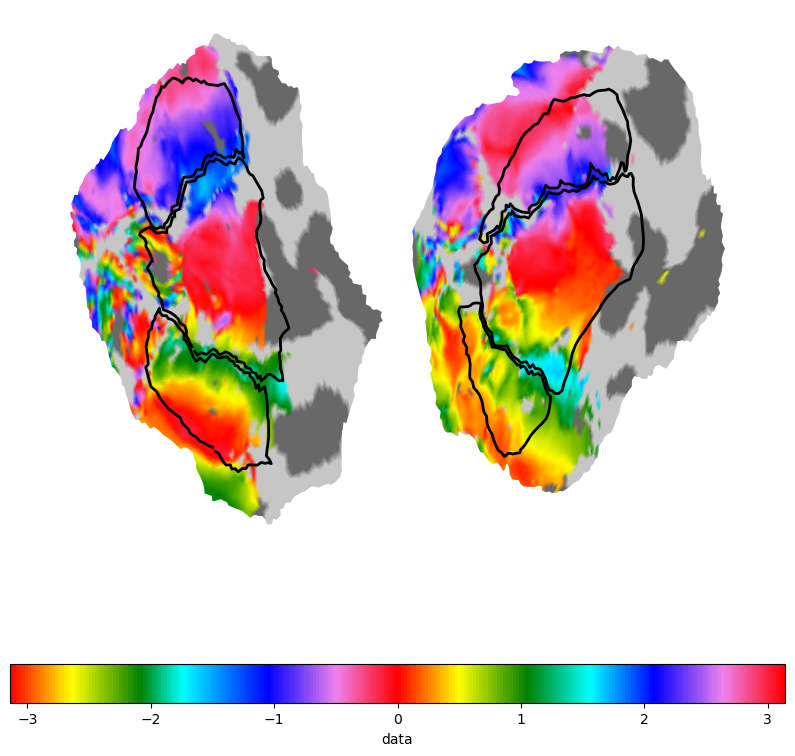

In [52]:
gm.flat_mpl(data=polar_angle_data, data_mask=data_mask, cmap='marco_pol', vmin=-np.pi, vmax=np.pi, roi_list=['v1custom', 'v2custom'])